In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv("Mall_Customers.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [18]:
data = data[['Annual Income (k$)','Spending Score (1-100)']]
data.rename(columns={'Annual Income (k$)':'Income','Spending Score (1-100)':'Score'},inplace=True)
data.head()

,Income,Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


Text(0, 0.5, 'Score')

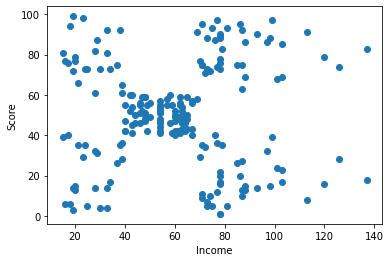

In [19]:
import matplotlib.pyplot as plt
plt.scatter(data.Income,data.Score)
plt.xlabel("Income")
plt.ylabel("Score")

## Find the best K value 

In [20]:
from sklearn.cluster import KMeans
k_values = [1,2,3,4,5,6,7,8,9]
wcss_error = []
for k in k_values:
    model = KMeans(n_clusters = k)
    model.fit(data[['Income','Score']])
    wcss_error.append(model.inertia_)

C:\Users\Laptop Outlet\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'WCSS eoor')

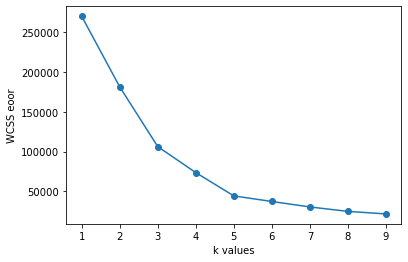

In [22]:
plt.plot(k_values,wcss_error)
plt.scatter(k_values,wcss_error)
plt.xlabel("k values")
plt.ylabel("WCSS eoor")

#### best k value is 5

## Train the model according to best k value

In [24]:
model = KMeans(n_clusters = 5)
pred = model.fit_predict(data)
pred

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [25]:
data['Cluster'] = pred
data.head(10)

,Income,Score,Cluster
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4
5,17,76,3
6,18,6,4
7,18,94,3
8,19,3,4
9,19,72,3


In [29]:
c1 = data[data['Cluster'] == 0]
c1.head()

,Income,Score,Cluster
43,39,61,0
46,40,55,0
47,40,47,0
48,40,42,0
49,40,42,0


In [30]:
c2 = data[data['Cluster'] == 1]
c3 = data[data['Cluster'] == 2]
c4 = data[data['Cluster'] == 3]
c5 = data[data['Cluster'] == 4]

Text(0, 0.5, 'Score')

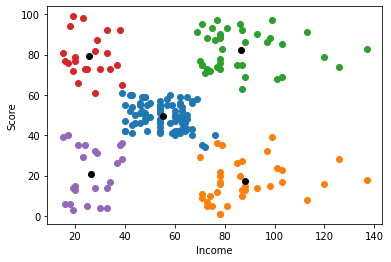

In [35]:
plt.scatter(c1.Income,c1.Score)
plt.scatter(c2.Income,c2.Score)
plt.scatter(c3.Income,c3.Score)
plt.scatter(c4.Income,c4.Score)
plt.scatter(c5.Income,c5.Score)
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color = 'black')
plt.xlabel("Income")
plt.ylabel("Score")